<h1>
    Sommaire<span class="tocSkip"></span>
</h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-1">
                    <span class="toc-item-num">1.&nbsp;&nbsp;</span>Chargement des données
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Segmentation-RFM-:-baseline" data-toc-modified-id="Segmentation-RFM-:-baseline-2">
                    <span class="toc-item-num">2.&nbsp;&nbsp;</span>Segmentation RFM : baseline
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Automatique" data-toc-modified-id="Automatique">
                            <span class="toc-item-num">2.1.&nbsp;&nbsp;</span>Automatique
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Manuelle" data-toc-modified-id="Manuelle">
                            <span class="toc-item-num">2.2.&nbsp;&nbsp;</span>Manuelle
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#Segmentation-kmeans-sur-plusieurs-variables-numériques" data-toc-modified-id="Segmentation-kmeans-sur-plusieurs-variables-numériques-3">
                    <span class="toc-item-num">3.&nbsp;&nbsp;</span>Segmentation kmeans sur plusieurs variables numériques
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Challenge-kmeans-avec-4-clusters" data-toc-modified-id="Challenge-kmeans-avec-4-clusters-31">
                            <span class="toc-item-num">3.1.&nbsp;&nbsp;</span>Challenge kmeans avec 4 clusters
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#Segmentation-k-prototypes-sur-tout-type-de-variables" data-toc-modified-id="Segmentation-k-prototypes-sur-tout-type-de-variables-4">
                    <span class="toc-item-num">4.&nbsp;&nbsp;</span>Segmentation k prototypes sur tout type de variables
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Analyse-de-la-stabilité-de-la-segmentation" data-toc-modified-id="Analyse-de-la-stabilité-de-la-segmentation-5">
                    <span class="toc-item-num">5.&nbsp;&nbsp;</span>Analyse de la stabilité de la segmentation
                </a>
            </span>
        </li>
    </ul>
</div>

In [21]:
import pandas as pd

dossier_data = "data/"
nom_fichier = "flipkart_com-ecommerce_sample_1050.csv"
produits_data = pd.read_csv(dossier_data+nom_fichier)

In [22]:
produits_data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

# Analyse des descriptions

## Tokenization, retrait de la ponctuation et mise en minuscules

In [152]:
produits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

Déjà, il n'y a pas de donnée manquante dans cette variable.

In [164]:
# Conservation de l'id et de la description pour la travailler et l'analyser
descriptions = produits_data[['uniq_id', 'description']].copy() 

In [173]:
# conserve les mots d'au moins une lettre (supprime donc la ponctuation)
tokenizer = nltk.RegexpTokenizer(r'\w+') 

for index_ligne, ligne in descriptions.iterrows():
    descriptions.at[index_ligne, "description_tokenisee"] = tokenizer.tokenize(ligne['description'].lower())


In [176]:
descriptions.iloc[0, 2]

['key',
 'features',
 'of',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '213',
 'cm',
 'in',
 'height',
 'pack',
 'of',
 '2',
 'price',
 'rs',
 '899',
 'this',
 'curtain',
 'enhances',
 'the',
 'look',
 'of',
 'the',
 'interiors',
 'this',
 'curtain',
 'is',
 'made',
 'from',
 '100',
 'high',
 'quality',
 'polyester',
 'fabric',
 'it',
 'features',
 'an',
 'eyelet',
 'style',
 'stitch',
 'with',
 'metal',
 'ring',
 'it',
 'makes',
 'the',
 'room',
 'environment',
 'romantic',
 'and',
 'loving',
 'this',
 'curtain',
 'is',
 'ant',
 'wrinkle',
 'and',
 'anti',
 'shrinkage',
 'and',
 'have',
 'elegant',
 'apparance',
 'give',
 'your',
 'home',
 'a',
 'bright',
 'and',
 'modernistic',
 'appeal',
 'with',
 'these',
 'designs',
 'the',
 'surreal',
 'attention',
 'is',
 'sure',
 'to',
 'steal',
 'hearts',
 'these',
 'contemporary',
 'eyelet'

In [177]:
descriptions

,uniq_id,description,description_tokenisee
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo..."
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic..."


In [ ]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

def freq_stats_descriptions():
    descriptions = defaultdict(list)

    # Création d'un corpus (descriptions) de tokens par produit
    for produit_id, description in produits.items():
        descriptions[produit_id] = tokenizer.tokenize(description.lower())

    stats, freq = dict(), dict()

    for produit_id, description_tokenise in descriptions.items():
        freq[produit_id] = fq = nltk.FreqDist(description_tokenise)
        stats[produit_id] = {'total': len(description_tokenise), 'unique': len(fq.keys())} 
        
    return (freq, stats, descriptions)

# Récupération des comptages
freq, stats, descriptions = freq_stats_descriptions()
df = pd.DataFrame.from_dict(stats, orient='index')

## Avant

In [24]:
produits_data[['uniq_id', 'product_name']][:15]

,uniq_id,product_name
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...
5,893aa5ed55f7cff2eccea7758d7a86bd,Maserati Time R8851116001 Analog Watch - For ...
6,f355cc1ccb08bd0d283ed979b7ee7515,"Camerii WM64 Elegance Analog Watch - For Men,..."
7,dd0e3470a7e6ed76fd69c2da27721041,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys
8,41384da51732c0b4df3de8f395714fbb,"Alfajr WY16B Youth Digital Watch - For Men, Boys"
9,710ed5f2393a4b9e8823aa0029f71f93,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...


Création d'un dictionnaire sous la forme uniq_id, description de la même manière que le cours d'OC.

In [59]:
produits = {}
for index_ligne, ligne in produits_data[['uniq_id', 'description']].iterrows():
    produits[ligne['uniq_id']] = ligne['description']

In [60]:
produits

{'55b85ea15a1536d46b7190ad6fff8ce7': 'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly f

In [61]:
produits['55b85ea15a1536d46b7190ad6fff8ce7']

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [62]:
import nltk
#nltk.download('punkt') # une fois installé, affiche un warning

description_produit1 = produits['f355cc1ccb08bd0d283ed979b7ee7515']
tokenizer = nltk.RegexpTokenizer(r'\w+') # retire toutes les ponctuations et les mots d'une lettre
#nltk.word_tokenize(description_produit1)
tokenizer.tokenize(description_produit1)

['Camerii',
 'WM64',
 'Elegance',
 'Analog',
 'Watch',
 'For',
 'Men',
 'Boys',
 'Buy',
 'Camerii',
 'WM64',
 'Elegance',
 'Analog',
 'Watch',
 'For',
 'Men',
 'Boys',
 'WM64',
 'Online',
 'at',
 'Rs',
 '449',
 'in',
 'India',
 'Only',
 'at',
 'Flipkart',
 'com',
 'Great',
 'Discounts',
 'Only',
 'Genuine',
 'Products',
 '30',
 'Day',
 'Replacement',
 'Guarantee',
 'Free',
 'Shipping',
 'Cash',
 'On',
 'Delivery']

In [103]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

def freq_stats_descriptions():
    descriptions = defaultdict(list)

    # Création d'un corpus (descriptions) de tokens par produit
    for produit_id, description in produits.items():
        descriptions[produit_id] = tokenizer.tokenize(description.lower())

    stats, freq = dict(), dict()

    for produit_id, description_tokenise in descriptions.items():
        freq[produit_id] = fq = nltk.FreqDist(description_tokenise)
        stats[produit_id] = {'total': len(description_tokenise), 'unique': len(fq.keys())} 
        
    return (freq, stats, descriptions)

# Récupération des comptages
freq, stats, descriptions = freq_stats_descriptions()
df = pd.DataFrame.from_dict(stats, orient='index')

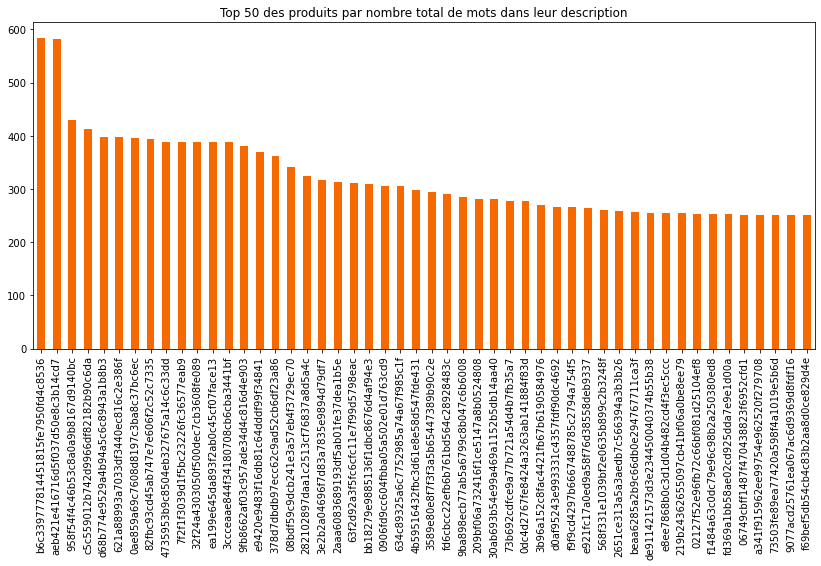

In [104]:
# Affichage du nombre total de mots des descriptions par produit
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 6)

df.sort_values(by='total', ascending=False, inplace=True)
df['total'][:50].plot(kind='bar', color="#f56900", title='Top 50 des produits par nombre total de mots dans leur description');

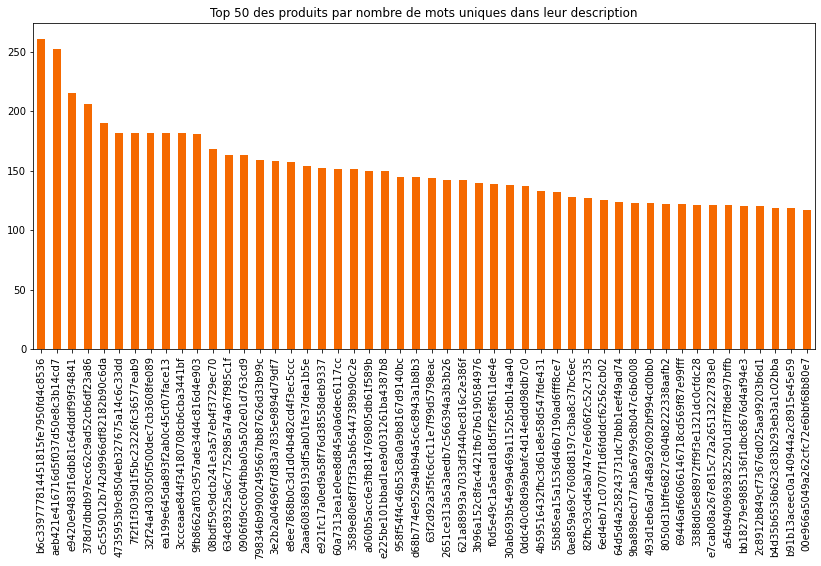

In [105]:
# Affichage des nombre de mots uniques présents dans la description
df.sort_values(by='unique', ascending=False, inplace=True)
df['unique'][:50].plot(kind='bar', color="#f56900", 
                       title='Top 50 des produits par nombre de mots uniques dans leur description');

In [100]:
df.describe()

,total,unique
count,1050.000000,1050.000000
mean,77.679048,45.493333
std,76.402993,32.789220
min,14.000000,10.000000
25%,31.000000,26.000000
50%,43.500000,31.000000
75%,97.000000,52.000000
max,584.000000,261.000000


Lorsque l'on regarde les stats de plus près, seuls une minorité de produits (moins de 25%) ont des descriptions aussi longues contenant plusieurs centaines de mots.

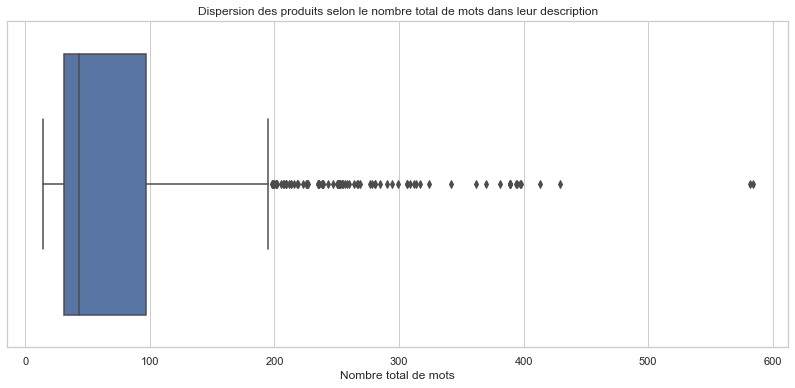

In [109]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.title("Dispersion des produits selon le nombre total de mots dans leur description")
ax = sns.boxplot(x=df["total"])
plt.xlabel("Nombre total de mots");

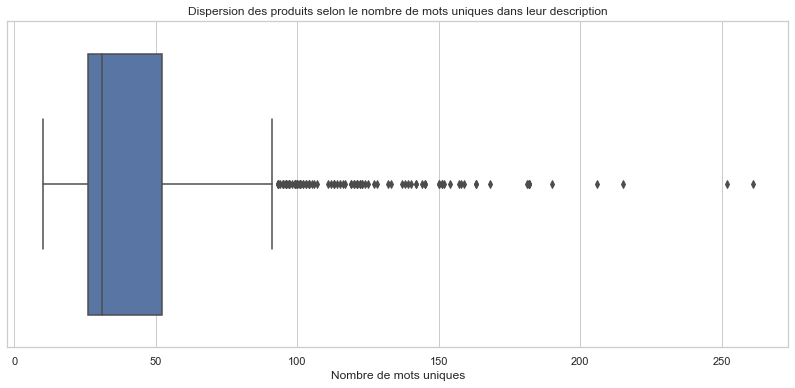

In [110]:
plt.title("Dispersion des produits selon le nombre de mots uniques dans leur description")
ax = sns.boxplot(x=df["unique"])
plt.xlabel("Nombre de mots uniques");

Pour avoir une idée générale, je vais regarder les mots les plus fréquents dans l'ensemble des descriptions. 

In [113]:
# Récupération de l'ensemble des mots dans une même liste de mots
liste_totalite_mots = []
for produits_id, description_tokenise in descriptions.items():
    for mot in description_tokenise:
        liste_totalite_mots.append(mot)

In [118]:
print("Il y a {} mots au total.".format(len(liste_totalite_mots)))

Il y a 81563 mots au total.


In [120]:
df.total.sum()

81563

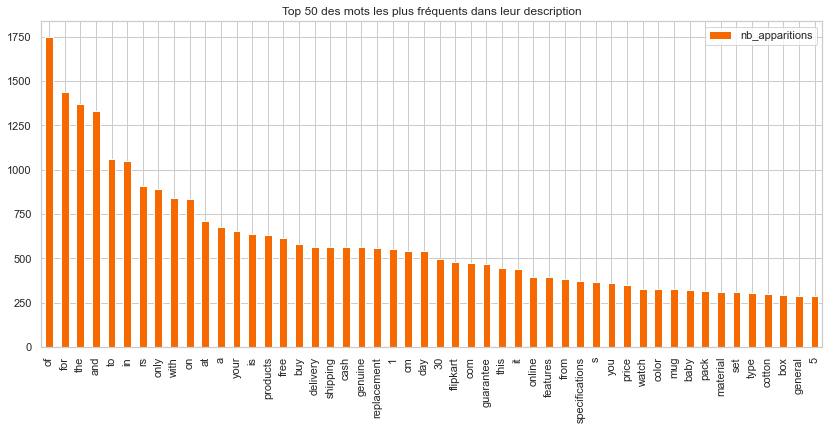

In [136]:
frequences_apparitions_mots = nltk.FreqDist(liste_totalite_mots)
df_freq = pd.DataFrame.from_dict(frequences_apparitions_mots, orient='index', columns=['nb_apparitions'])
df_freq.sort_values(by="nb_apparitions", ascending=False, inplace=True)
df_freq[:50].plot(kind='bar', color="#f56900", title='Top 50 des mots les plus fréquents dans leur description');

On voit clairement que les mots de liaisons sont les plus nombreux, ils seront supprimés lors de l'étape de suppression des stopwords. C'est le cas aussi des unités comme "rs", "cm", les nombres et le nom du site "flipkart", une suppression plus manuelle sera probablement à effectuer.

## Suppression des stopwords

In [145]:
# Récupération des stopwords en anglais
#nltk.download('stopwords') # une fois installé, affiche un warning
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each